#### clean_ML_info_500.csv 크롤링 데이터 항목 분리 & 저장

* 지원 조건 
	- 경력, 학력, 스킬, 핵심역량

* 근무 조건
	- 고용형태

* 기업 정보
	- 산업(업종), 기업형태

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

from konlpy.tag import Okt
from wordcloud import WordCloud

import numpy as np
from PIL import Image


In [ ]:
# DF 로드
raw = pd.read_csv('final_clean_ML_info_500.csv', encoding='utf-8-sig')
print(raw.iloc[0])

#### 지원 조건 
	- 경력, 학력, 스킬, 핵심역량

In [ ]:
data_dict = {}
columns = ['경력','학력','핵심역량', '스킬']

require = raw['apply_require'].to_list()
print(require[0])
print(require[0].split())

In [ ]:
tot_tmp_list = []
# print(tmp_list)

In [ ]:
def clean_string(s):
    # 줄바꿈(\n, \r) 제거
    s = s.replace('\n', ' ').replace('\r', ' ')
    # 두 칸 이상의 공백을 하나의 공백으로 변경
    s = re.sub(r'\s{2,}', ' ', s)
    # "," 제거
    s = s.replace(",","")
    # 문자열 양쪽의 공백 제거
    return s.strip()

In [ ]:
import re
import numpy as np

In [ ]:
def extract(text):
	patterns ={
		"경력" : r"경일력\s*([^·.]+)",
		"학력" : r"학일력\s*([^.]+)",
		"스킬" : r"스킬\s*([^.]+)",
		"핵심역량": r"핵심역량\s*([^.]+)",
		"우대" : r"우대\s*([^.]+)"
	}

	result={}

	for k, v in patterns.items():
		match = re.search(v, text)
		if match:
			result[k] = match.group(1).strip()

	return result

period = [np.nan]*len(require)					# 경력
degree = [np.nan]*len(require)					# 학력
utility = [np.nan]*len(require)					# 역량
skill = [np.nan]*len(require)					# 스킬

for idx, r in enumerate(require):
	# print(extract(r))
	sss = extract(r)
	
	if '경력' in sss.keys():
		period[idx] = sss['경력']

	if '학력' in sss.keys():
		degree[idx] = sss['학력']

	if '핵심역량' in sss.keys():
		utility[idx] = sss['핵심역량']

	if '스킬' in sss.keys():
		skill[idx] = sss['스킬']

print(period[100:105])
print(degree[100:105])
print(utility[100:105])
print(skill[100:105])

In [ ]:
##

apply_500_DF = pd.DataFrame( {'기업명': raw['comp_name'].to_list(), '경력':period, '학력':degree, '핵심역량':utility, '스킬':skill})
apply_500_DF.head(5)

In [ ]:
# 저장
apply_500_DF.to_csv('apply_info_500.csv', index=False, encoding='utf-8-sig')
# apply_500_DF.to_excel('apply_info_500_excel.excel',index=False)

#### 핵심역량 & 스킬 워드클라우드

In [ ]:
# 내용 .txt 파일로 저장

# apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()
# apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()

In [ ]:
# "'", "," 삭제

skill_list = apply_500_DF['스킬'][~apply_500_DF['스킬'].isna()].to_list()

with open ("skill_final_text.txt","w") as f:
	
	for skill in skill_list:
		f.write(clean_string(skill))

    # skill_list[idx] = skill.replace(",","").replace("'","")

In [ ]:
utility_list = apply_500_DF['핵심역량'][~apply_500_DF['핵심역량'].isna()].to_list()

with open ("utility_final_text.txt","w") as f:
	
	for utility in utility_list:
		f.write(clean_string(utility) + ' ')

In [ ]:
## 스킬 워드클라우드

# -----------------------------------------------------------
# 영문 wordCloud 생성

# 한글 내용 삭제 - skill_final_text_2.txt
# -----------------------------------------------------------

from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

# stopwords = set(STOPWORDS)
# stopwords.add("Python Pytorch")



text = open('skill_final_text_2.txt').read()


# 워드클라우드 출력 형태 이미지 마스크 설정
img_mask = np.array(Image.open('cloud.png'))


# 워드클라우드 분석 ----------------------------------------------------------
wc = WordCloud(width=400, height=400,
               background_color="darkgrey", max_font_size=200,
               stopwords=STOPWORDS,
               repeat=False,
               colormap='seismic', mask=img_mask).generate(text)

# # 딕셔너리 형태로 할당해야만!!
# cloud = wc.generate_from_frequencies(dict(tags))

# words_: 객체의 비율 정보가 담긴 딕셔너리 반환
print(wc.words_)

# 워드클라우드 결과 이미지 생성
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wc)
plt.show()

['계획성', '성실', '성실', '성취', '지향성', '계획성', '계획성', '성취', '지향성', '계획성', '성취', '지향성', '계획성', '성실', '계획성', '성취', '지향성', '계획성', '성실', '계획성', '성실', '계획성', '성취', '지향성', '창의성', '성장', '지향성', '성실', '협동', '심', '계획성', '성실', '적응', '창의성', '협동', '심', '계획성', '성실', '협동', '심', '메타', '성취', '지향성', '성실', '협동', '심', '계획성', '성실', '성실', '성취', '지향성', '스트레스', '관리', '성장', '지향성', '계획성', '윤리', '의식', '자존감', '적응', '창의성', '협동', '심', '계획성', '성취', '지향성', '성취', '지향성', '메타', '성실', '창의성', '계획성', '성실', '계획성', '성실', '성실', '윤리', '의식', '협동', '심', '성장', '지향성', '성취', '지향성', '계획성', '성실', '협동', '심', '적응', '창의성', '창의성', '협동', '심', '성장', '지향성', '성실', '자존감', '적응', '성실', '성취', '지향성', '협동', '심', '성장', '지향성', '적응', '협동', '심', '계획성', '성장', '지향성', '성실', '성취', '지향성', '성장', '지향성', '성실', '성취', '지향성', '계획성', '창의성', '성장', '지향성', '협동', '심', '적응', '성실', '성취', '지향성', '창의성', '협동', '심', '성장', '지향성', '계획성', '메타', '스트레스', '관리', '윤리', '의식', '자존감', '적응', '스트레스', '관리', '적응', '성장', '지향성', '성실', '창의성', '협동', '심', '계획성', '성실', '성취', '지향성', '성실', '윤리', '의식', 

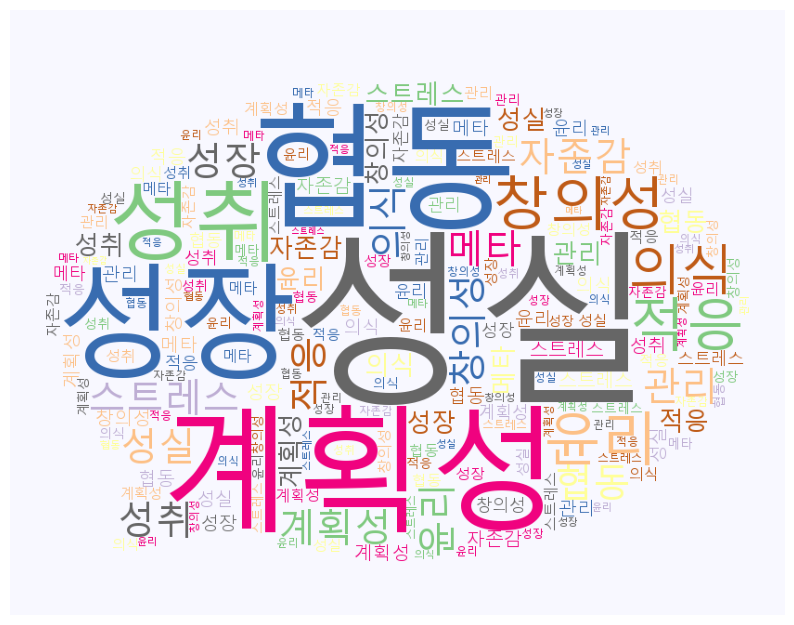

In [193]:
# 핵심역량 워드클라우드

# -----------------------------------------------------------
# 단어 분석 및 wordCloud 생성
# -----------------------------------------------------------

from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import platform

import numpy as np
from PIL import Image

okt = Okt() # Open Korean Text 객체 생성

text = open('utility_final_text.txt', encoding='utf-8').read()


# okt() 함수로 형태소 분석
sentences_tag = []
sentences_tag = okt.pos(text)

# tag가 명사 or 형용사인 단어들만 할당
noun_list = []
for word, tag in sentences_tag:
    if tag in ['Noun']:
        noun_list.append(word)

print(noun_list)

# 가장 많이 나온 단어 TOP 50 
counts = Counter(noun_list)
tags = counts.most_common(20)           # -> Counter(리스트) --> 리스트 항목의 각 개수를 Dict 반환
print(tags)                             # -> most_common(n) -->  빈도 수가 높은 상위 n개 반환        

stopwords= '심'

# tags.pop(stopwords)
tags.pop(4)
tags.pop(0)

print(tags)

# 한글 분석 위한 font 한글로 지정
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'


# 워드클라우드 출력 형태 이미지 마스크 설정
img_mask = np.array(Image.open('balloon.png'))

# 워드클라우드 분석 ----------------------------------------------------------
wc = WordCloud(font_path=path, width=400, height=400,
               background_color="ghostwhite", max_font_size=200,
               repeat=True,
               colormap='Accent_r', mask=img_mask)

# 딕셔너리 형태로 할당해야만!!
cloud = wc.generate_from_frequencies(dict(tags))

# 워드클라우드 결과 이미지 생성
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

##### 경력 막대그래프

In [ ]:
apply_500_DF.groupby('경력').count().reset_index()

In [ ]:
period_count = apply_500_DF.groupby('경력').count().reset_index()
period_count.loc[0:13]['기업명'].sum()

In [ ]:
xx = ['신입','경력']
yy = [121, period_count.loc[0:13]['기업명'].sum()]

colors = plt.cm.tab20.colors

plt.title(
    label="머신러닝 엔지니어 공고 비율", 
    fontdict={"fontsize":19},
    pad=10
)


plt.pie(yy, labels=xx, autopct='%.1f%%', startangle=90, counterclock=False,explode=[0.05, 0.05],
        colors=['lightsteelblue','darksalmon'], shadow=True, textprops={'fontsize': 14}, wedgeprops = {'width' : 0.75})
plt.show()

In [ ]:
apply_500_DF['경력'].value_counts()

In [ ]:
apply_500_DF['경력'].value_counts().index

In [ ]:
apply_500_DF['경력'].value_counts().values

In [ ]:
plt.figure(figsize=(10,6))

colors = plt.cm.tab20.colors

xxx = apply_500_DF['경력'].value_counts().index[2:8]
yyy = apply_500_DF['경력'].value_counts().values[2:8]


plt.bar(xxx,yyy, color=colors[1:-1:2])
plt.title("경력 요구 년도 비교", fontsize=22, pad=12)
plt.ylim(bottom=0,top=110)
plt.show()

In [ ]:
apply_500_DF.groupby('학력').count().reset_index()

In [ ]:
apply_500_DF['학력'].value_counts().index

In [ ]:
plt.figure(figsize=(14,6))

colors = plt.cm.tab20.colors

xxx = apply_500_DF['학력'].value_counts().index[0:5]
yyy = apply_500_DF['학력'].value_counts().values[0:5]

bar1=plt.bar(xxx,yyy, color=colors[1:-1:2])

plt.bar_label(bar1, fmt ='{:,.0f}건', label_type='edge', padding=6, fontsize=12)

plt.title("학력 요구사항 비교", fontsize=22, pad=12)
plt.xticks(rotation=45)
plt.ylim(bottom=0,top=190)
plt.show()